In [13]:
import os
import numpy as np
import pandas as pd
import Image_finder
import cv2
import pickle
from matplotlib import pyplot as plt

In [14]:
proj_loc = os.path.join(os.getcwd(),"faces_resized\\")

# Compiling list of images in proj_loc directory
a = Image_finder.Image_finder(directory=proj_loc)

# Creating a list of files with resolutions greater than 100x100
img_list = np.array([cv2.imread(file).astype('uint8') for file in a.file_lst()])/255

---------- Imagefinder ----------
No. directories: 1
No. files: 855


In [15]:
img_list.shape[1:]

(200, 200, 3)

In [42]:
import keras
from keras.models import Model
#from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,UpSampling2D, BatchNormalization, Reshape, Input
from keras.layers import *
from keras.optimizers import *
from keras.metrics import *

In [43]:
int_dim = 500
latent_dim = 2

In [44]:
''' Encoding the images '''
input_ = Input(shape=img_list.shape[1:])

enc_0 = Conv2D(filters=32 ,kernel_size=(3,3) ,padding='same', activation='relu')(input_)
enc_1 = MaxPooling2D(pool_size=(2, 2))(enc_0)

enc_2 = Conv2D(filters=18 ,kernel_size=(3,3) ,padding='same', activation='relu')(enc_1)
enc_3 = MaxPooling2D(pool_size=(2, 2))(enc_2)

enc_4 = Conv2D(filters=12 ,kernel_size=(3,3) ,padding='same', activation='relu')(enc_3)
enc_5 = MaxPooling2D(pool_size=(2, 2))(enc_4)


''' Decoding the images '''
dec_8 = Conv2D(filters=12 ,kernel_size=(3,3), padding='same', activation='relu')(enc_5)
dec_9 = UpSampling2D((2, 2),interpolation='bilinear')(dec_8)

dec_10 = Conv2D(filters=18 ,kernel_size=(3,3) ,padding='same', activation='relu')(dec_9)
dec_11 = UpSampling2D((2, 2),interpolation='bilinear')(dec_10)

dec_12 = Conv2D(filters=32 ,kernel_size=(3,3) ,padding='same', activation='relu')(dec_11)
dec_13 = UpSampling2D((2, 2),interpolation='bilinear')(dec_12)

output_ = Conv2D(filters=3 ,kernel_size=(3,3), padding='same', activation='relu')(dec_13)

autoencoder = Model(input_,output_)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 100, 100, 18)      5202      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 50, 50, 18)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 50, 50, 12)        1956      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 25, 25, 12)        0         
__________

In [45]:
#Compliling the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
autoencoder.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [46]:
''' Method to plot loss in real time'''
from matplotlib import pyplot as plt
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    ''' Method to plot fit progress. '''
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

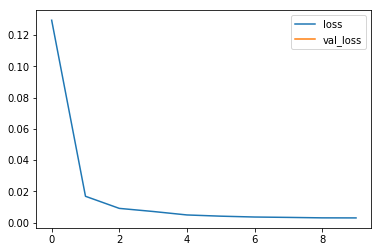

In [22]:
autoencoder.fit(x=img_list, y=img_list, epochs=10, callbacks=[plot_losses], shuffle=True)

# Check model outputs

In [23]:
outputs = autoencoder.predict(img_list)

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


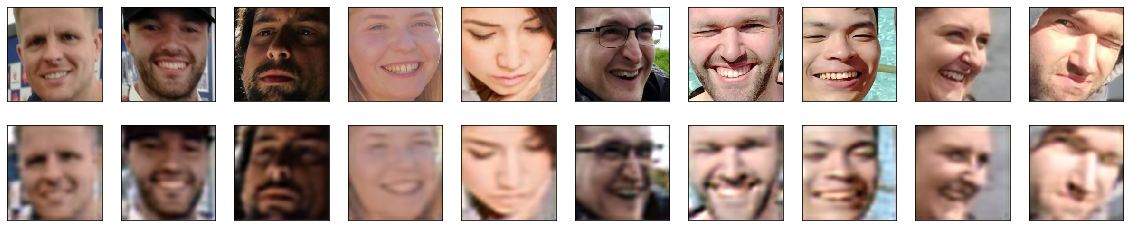

In [25]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img_list[i+35][:,:,::-1])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(outputs[i+35][:,:,::-1])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Vae

In [47]:
int_dim1 = 1000
int_dim2 = 500
latent_dim = 2

In [72]:
''' Encoding the images '''
input_ = Input(shape=img_list.shape[1:])

enc_0 = Conv2D(filters=32 ,kernel_size=(3,3) ,padding='same', activation='relu')(input_)
enc_1 = MaxPooling2D(pool_size=(2, 2))(enc_0)

enc_2 = Conv2D(filters=18 ,kernel_size=(3,3) ,padding='same', activation='relu')(enc_1)
enc_3 = MaxPooling2D(pool_size=(2, 2))(enc_2)

enc_4 = Conv2D(filters=12 ,kernel_size=(3,3) ,padding='same', activation='relu')(enc_3)
enc_5 = MaxPooling2D(pool_size=(2, 2))(enc_4)

int_1 = Flatten()(enc_5)
int_2 = Dense(2000)(int_1)
int_3 = Dense(500)(int_2)

z_mean = Dense(2)(int_3)
z_sigma = Dense(2)(int_3)

# Sampling from a gaussian distribution to add some randomness to the latent vector
def sampling(args):
    z_mean, z_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0],latent_dim),mean=0.,stddev=1.0)
    return z_mean + K.exp(z_sigma/2) * epsilon

z = Lambda(sampling)([z_mean, z_sigma])

''' Decoding the images '''

dec_1 = Dense(500)(z)
dec_2 = Dense(2000)(dec_1)

dec_3 = Dense(7500)(dec_2)
dec_4 = Reshape((25, 25, 12))(dec_3)

dec_8 = Conv2D(filters=12 ,kernel_size=(3,3), padding='same', activation='relu')(dec_4)
dec_9 = UpSampling2D((2, 2),interpolation='bilinear')(dec_8)

dec_10 = Conv2D(filters=18 ,kernel_size=(3,3) ,padding='same', activation='relu')(dec_9)
dec_11 = UpSampling2D((2, 2),interpolation='bilinear')(dec_10)

dec_12 = Conv2D(filters=32 ,kernel_size=(3,3) ,padding='same', activation='relu')(dec_11)
dec_13 = UpSampling2D((2, 2),interpolation='bilinear')(dec_12)

output_ = Conv2D(filters=3 ,kernel_size=(3,3), padding='same', activation='relu')(dec_13)





#output_z = generator(z)


vae = Model(input_,output_)
vae.summary()

#generator = Model(gen_input_,output_)
#gen_input_ = Input(shape=(None,latent_dim), name="Input")
#generator.summary()



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_154 (Conv2D)             (None, 200, 200, 32) 896         input_24[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_70 (MaxPooling2D) (None, 100, 100, 32) 0           conv2d_154[0][0]                 
__________________________________________________________________________________________________
conv2d_155 (Conv2D)             (None, 100, 100, 18) 5202        max_pooling2d_70[0][0]           
__________________________________________________________________________________________________
max_poolin

In [80]:
def vae_loss(input_, output_):
    # Reconstruction loss
    encode_loss = K.sum(binary_crossentropy(input_,output_))
    #encode_loss = binary_crossentropy(K.flatten(input_),K.flatten(output_)) 
    
    gauss_loss = - 0.5 * K.sum(1 + z_sigma - K.square(z_mean) - K.exp(z_sigma), axis=-1)
    
    return encode_loss + gauss_loss

In [81]:
vae.compile(optimizer='rmsprop', loss=vae_loss)

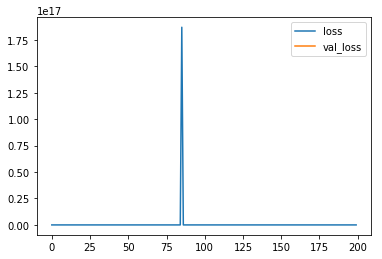

In [87]:
vae.fit(x=img_list, y=img_list, epochs=200, callbacks=[plot_losses], shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


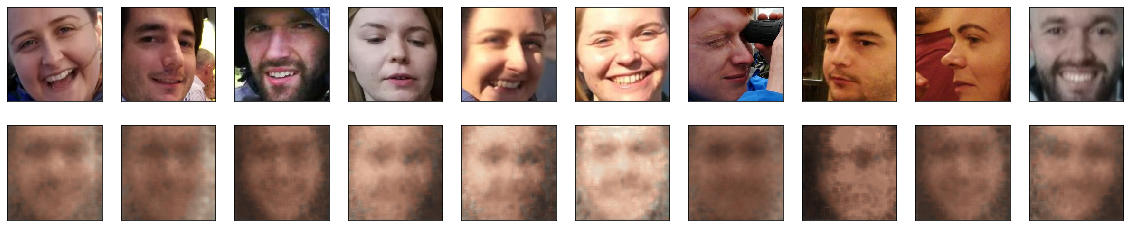

In [88]:
decoded_imgs = vae.predict(img_list)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    #plt.imshow(img_list[i].reshape(28, 28))
    plt.imshow(img_list[i][:,:,::-1])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    #plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.imshow(decoded_imgs[i][:,:,::-1])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [84]:
# display a 2D manifold of the digits
n = 20  # figure with 15x15 digits
digit_size = 28
epsilon_std = 0.1
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[[xi, yi]]]) * epsilon_std
        #print(z_sample.shape)
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0]
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

ValueError: could not broadcast input array from shape (200,200,3) into shape (28,28)